In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as stats

%matplotlib inline

In [2]:
blues = sns.color_palette('Blues', 9)
reds = sns.color_palette('Reds', 9)
greens = sns.color_palette('Greens', 9)
oranges = sns.color_palette('Oranges', 9)
grays = sns.color_palette('Greys', 9)
purples = sns.color_palette('Purples', 9)
prs = sns.color_palette('PRGn', 9)
tanteals = sns.color_palette('BrBG', 9)
pinkgreens = sns.color_palette('PiYG', 9)[::-1]

In [3]:
oxoplate_mutants = pd.read_csv('oxoplate_mutants.csv', delimiter = ',', usecols = [1, 3])

In [4]:
# genotype: wild-type ("glucose"), or knockout mutants as listed
# value: oxygen consumption rate in umol/od/gen
# the excluded column in the raw data, "variable", distinguishes technical replicates collected on the same day
oxoplate_mutants.head()

,genotype,value
0,glucose,1321.947907
1,petite,457.013570
2,reg1,1823.223891
3,rgt2snf3,6059.971032
4,mig1mig2,1399.722454


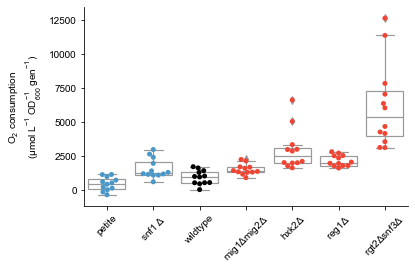

In [5]:
f, ax = plt.subplots()

sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

carbon_palette = {'glucose': 'black', 'sucrose': blues[5], 'galactose': blues[5],
                 'acetate': reds[5], 'glycerol': reds[5], 'ethanol': reds[5],
                 'petite' : blues[5], 'reg1' : reds[5], 'rgt2snf3': reds[5],
                  'mig1mig2': reds[5], 'snf1' : blues[5], 'hxk2': reds[5]}

sns.boxplot(x = 'genotype', y = 'value', data = oxoplate_mutants, color = 'white',
           order = ['petite', 'snf1', 'glucose', 'mig1mig2', 'hxk2', 'reg1', 'rgt2snf3'])
sns.swarmplot(x = oxoplate_mutants['genotype'], y = oxoplate_mutants['value'], palette = carbon_palette,
             order = ['petite', 'snf1', 'glucose', 'mig1mig2', 'hxk2', 'reg1', 'rgt2snf3'], s = 5)
ax.set_xlabel('')
#ax.set_ylim(-100, 10000)
plt.xticks(rotation = 45)
#plt.title('Oxygen consumption weighted by growth rate');
ax.set_ylabel('$\mathregular{O_{2}}$ consumption \n($\mathregular{\mu mol\; L^{-1}\; OD_{600}^{-1}\; gen^{-1}}$)');
ax.set_xticklabels(['petite', 'snf1 $\mathregular{\Delta}$', 'wildtype',
                    'mig1$\mathregular{\Delta}$mig2$\mathregular{\Delta}$', 'hxk2$\mathregular{\Delta}$',
                    'reg1$\mathregular{\Delta}$', 'rgt2$\mathregular{\Delta}$snf3$\mathregular{\Delta}$']);
plt.tight_layout()
sns.despine()


In [23]:
stats.ttest_ind(oxoplate_mutants[oxoplate_mutants['genotype'] == 'glucose']['value'],
                  oxoplate_mutants[oxoplate_mutants['genotype'] == 'petite']['value'])

Ttest_indResult(statistic=2.3035096599213976, pvalue=0.03107715097071035)

In [18]:
stats.ttest_ind(oxoplate_mutants[oxoplate_mutants['genotype'] == 'glucose']['value'],
                  oxoplate_mutants[oxoplate_mutants['genotype'] == 'snf1']['value'])

Ttest_indResult(statistic=-2.52126306110964, pvalue=0.01944159148558886)

In [19]:
stats.ttest_ind(oxoplate_mutants[oxoplate_mutants['genotype'] == 'glucose']['value'],
                  oxoplate_mutants[oxoplate_mutants['genotype'] == 'mig1mig2']['value'])

Ttest_indResult(statistic=-3.138599858008399, pvalue=0.004773601343819247)

In [20]:
stats.ttest_ind(oxoplate_mutants[oxoplate_mutants['genotype'] == 'glucose']['value'],
                  oxoplate_mutants[oxoplate_mutants['genotype'] == 'hxk2']['value'])

Ttest_indResult(statistic=-4.41771210700381, pvalue=0.00021747118373283098)

In [21]:
stats.ttest_ind(oxoplate_mutants[oxoplate_mutants['genotype'] == 'glucose']['value'],
                  oxoplate_mutants[oxoplate_mutants['genotype'] == 'reg1']['value'])

Ttest_indResult(statistic=-6.4260125085173785, pvalue=1.8240115269251068e-06)

In [22]:
stats.ttest_ind(oxoplate_mutants[oxoplate_mutants['genotype'] == 'glucose']['value'],
                  oxoplate_mutants[oxoplate_mutants['genotype'] == 'rgt2snf3']['value'])

Ttest_indResult(statistic=-5.737148567819786, pvalue=9.028101553624145e-06)